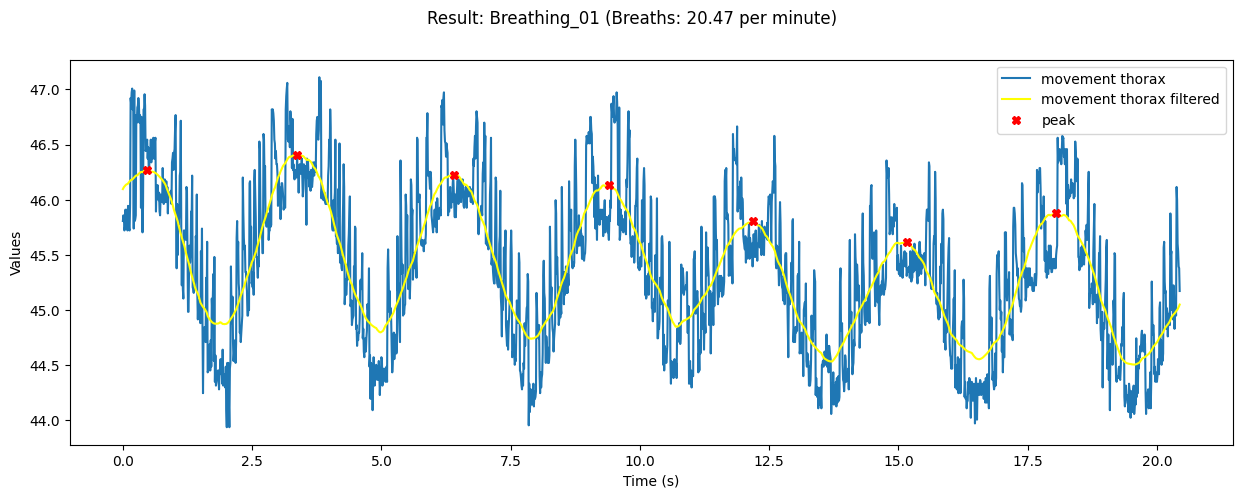

In [20]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

# Read file
data = pd.read_csv('v2_atmung_3.csv')

# X, Y, Z-Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

sgf = signal.savgol_filter(d_values, window_length=250, polyorder=2, mode="nearest")
peaks, _ = find_peaks(sgf,  height=45.25, distance=125)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Create a figure and set its size to 15x5 in.
fig, ax2 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Breathing_01 (Breaths: {breaths:.2f} per minute)')

# Plot a line chart
ax2.plot(time_series, d_values, label='movement thorax')
ax2.plot(time_series, sgf, label='movement thorax filtered', color="yellow")
ax2.plot(time_series[peaks], sgf[peaks], 'X', label='peak', color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Values')
ax2.legend()

# Show plot
plt.show()

/Library/Python/3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Python/3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


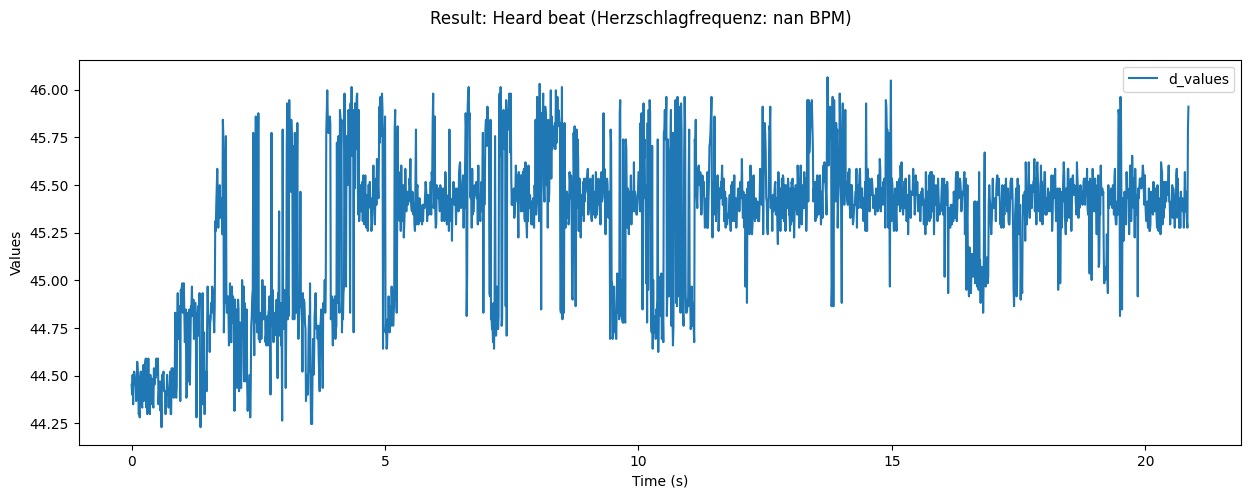

In [22]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file
data = pd.read_csv('v2_herz_5.csv')

# X, Y, Z-Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

# Beschleunigungsmagnitude berechnen
acceleration = np.sqrt(d_values**2 + d_values**2 + d_values**2)

# Normalisieren der z-Komponente
z_component = (d_values - d_values.mean()) / d_values.std()

# Peaks in der normalisierten z-Komponente finden
peaks, _ = find_peaks(z_component, height=2, distance=50)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax4 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Heard beat (Herzschlagfrequenz: {heartbeats:.2f} BPM)')

ax4.plot(time_series, d_values, label='d_values')
#ax4.scatter(time_series[peaks], z_component.iloc[peaks], c='r', marker='x', label='Peaks')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Values')
ax4.legend()

# Diagramm anzeigen
plt.show()